In [2]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.DataFrame(pd.read_csv("Laptop_price.csv"))



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.3      1000 non-null   int64  
 1   Unnamed: 0.2      821 non-null    float64
 2   Unnamed: 0.1      677 non-null    float64
 3   Unnamed: 0        586 non-null    float64
 4   Brand             516 non-null    object 
 5   Processor_Speed   503 non-null    float64
 6   RAM_Size          513 non-null    float64
 7   Storage_Capacity  522 non-null    float64
 8   Screen_Size       522 non-null    float64
 9   Weight            524 non-null    float64
 10  Price             530 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 86.1+ KB


In [5]:
df.describe()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,821.000000,677.000000,586.000000,503.000000,513.000000,522.000000,522.000000,524.000000,530.000000
mean,499.500000,488.540804,511.375185,503.610922,2.735669,15.165692,589.195402,14.092343,3.472393,19667.096689
std,288.819436,286.118549,284.937771,285.193080,0.756528,10.941153,312.372207,1.707953,0.885382,9152.697053
min,0.000000,1.000000,0.000000,2.000000,1.512350,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,249.750000,241.000000,275.000000,264.250000,2.050837,4.000000,256.000000,12.640260,2.675831,10407.896330
50%,499.500000,485.000000,514.000000,507.000000,2.741917,8.000000,512.000000,14.192515,3.462152,17314.063457
75%,749.250000,730.000000,757.000000,745.750000,3.414998,32.000000,1000.000000,15.641059,4.265277,31566.226873
max,999.000000,999.000000,999.000000,999.000000,3.998534,32.000000,1000.000000,16.978390,4.990728,33503.935037


In [6]:
df.isnull().sum()

Unnamed: 0.3          0
Unnamed: 0.2        179
Unnamed: 0.1        323
Unnamed: 0          414
Brand               484
Processor_Speed     497
RAM_Size            487
Storage_Capacity    478
Screen_Size         478
Weight              476
Price               470
dtype: int64

In [7]:
df.fillna(df.mean(),inplace=True)
df["Brand"].fillna(df["Brand"].mode()[0],inplace=True)
print(df["Price"].nunique())  # Count unique values
print(df["Price"].unique()[:10])  # Show first 10 unique values


531
[19667.09668945 31607.60591927 17436.72833421  9543.71998013
  9214.484506   18501.83273321 31967.60763154 18534.10862992
 17495.98363759  9637.8916382 ]


In [8]:
df.drop(columns=["Unnamed: 0.2","Unnamed: 0.1","Unnamed: 0","Weight"],inplace=True)
df.drop(columns=["Unnamed: 0.3"],inplace=True)
print(df["Price"].nunique())  # Count unique values
print(df["Price"].unique()[:10])  # Show first 10 unique values


531
[19667.09668945 31607.60591927 17436.72833421  9543.71998013
  9214.484506   18501.83273321 31967.60763154 18534.10862992
 17495.98363759  9637.8916382 ]


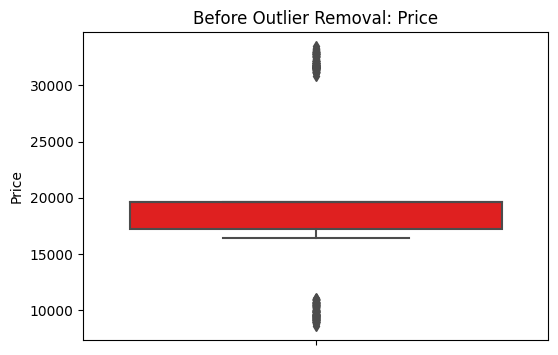

In [9]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# First Plot: Check outliers in "Price" before removal
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["Price"], color="red")
plt.title("Before Outlier Removal: Price")
plt.show()


In [10]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Remove rows where "Price" is an outlier
df_cleaned = df[(df["Price"] >= lower_bound) & (df["Price"] <= upper_bound)]

print(f"Number of rows before outlier removal: {len(df)}")
print(f"Number of rows after outlier removal: {len(df_cleaned)}")



Lower Bound: 13471.19778643283, Upper Bound: 23384.6360312587
Number of rows before outlier removal: 1000
Number of rows after outlier removal: 654


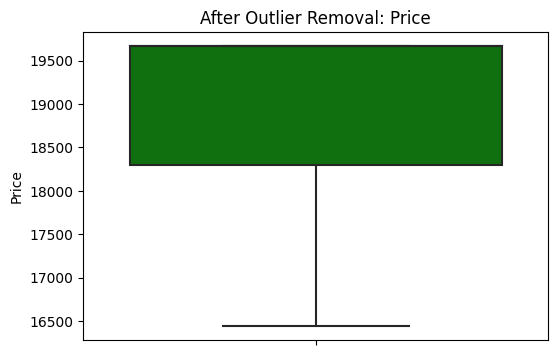

In [11]:
# Second Plot: Check outliers in "Price" after removal
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_cleaned["Price"], color="green")
plt.title("After Outlier Removal: Price")
plt.show()



In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Brand"] = label_encoder.fit_transform(df["Brand"])
df["Brand"].unique()


array([2, 4, 0, 1, 3])

In [13]:
import pandas as pd
correlation_matrix = df.corr()
print(correlation_matrix)
df

                     Brand  Processor_Speed  RAM_Size  Storage_Capacity  \
Brand             1.000000         0.029720  0.010042          0.009551   
Processor_Speed   0.029720         1.000000  0.003059         -0.035952   
RAM_Size          0.010042         0.003059  1.000000         -0.044783   
Storage_Capacity  0.009551        -0.035952 -0.044783          1.000000   
Screen_Size      -0.064391        -0.001801 -0.035560         -0.014936   
Price            -0.007023         0.008884 -0.006775          0.608525   

                  Screen_Size     Price  
Brand               -0.064391 -0.007023  
Processor_Speed     -0.001801  0.008884  
RAM_Size            -0.035560 -0.006775  
Storage_Capacity    -0.014936  0.608525  
Screen_Size          1.000000 -0.025584  
Price               -0.025584  1.000000  


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Price
0,2,2.735669,15.165692,589.195402,14.092343,19667.096689
1,2,2.912833,15.165692,589.195402,14.092343,31607.605919
2,4,2.735669,4.000000,589.195402,11.853023,19667.096689
3,0,2.735669,15.165692,512.000000,14.092343,17436.728334
4,2,2.735669,15.165692,589.195402,14.092343,19667.096689
...,...,...,...,...,...,...
995,2,2.735669,15.165692,589.195402,14.092343,31593.668017
996,2,2.735669,15.165692,589.195402,12.679356,19667.096689
997,2,2.735669,4.000000,512.000000,12.666315,16552.404779
998,2,2.735669,15.165692,589.195402,11.215581,19667.096689


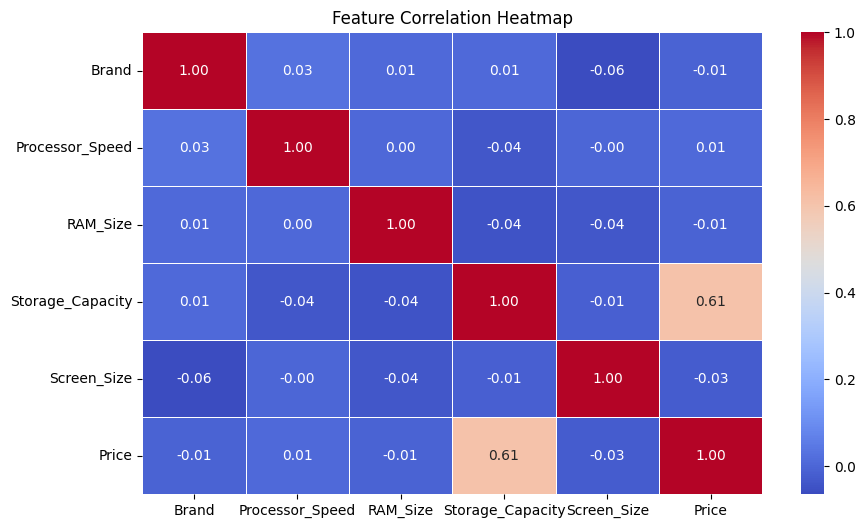

In [14]:

correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")

plt.show()


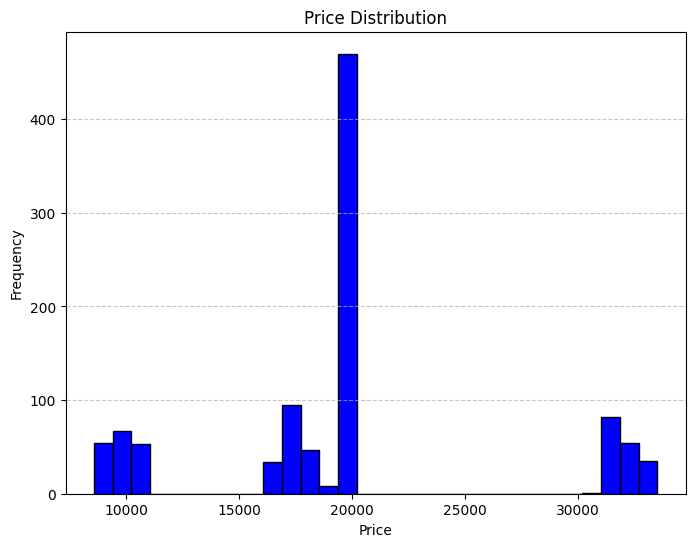

In [131]:
import matplotlib.pyplot as plt

# Histogram to check price distribution
plt.figure(figsize=(8,6))
plt.hist(df['Price'], bins=30, color='blue', edgecolor='black')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Y = df["Price"]
X = df[["Storage_Capacity",""]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale features
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Model evaluation
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)

print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")

Train R²: 0.2869
Test R²: 0.5417


In [16]:
print(df.corr())  # Check correlation between Processor_Speed and Price



                     Brand  Processor_Speed  RAM_Size  Storage_Capacity  \
Brand             1.000000         0.029720  0.010042          0.009551   
Processor_Speed   0.029720         1.000000  0.003059         -0.035952   
RAM_Size          0.010042         0.003059  1.000000         -0.044783   
Storage_Capacity  0.009551        -0.035952 -0.044783          1.000000   
Screen_Size      -0.064391        -0.001801 -0.035560         -0.014936   
Price            -0.007023         0.008884 -0.006775          0.608525   

                  Screen_Size     Price  
Brand               -0.064391 -0.007023  
Processor_Speed     -0.001801  0.008884  
RAM_Size            -0.035560 -0.006775  
Storage_Capacity    -0.014936  0.608525  
Screen_Size          1.000000 -0.025584  
Price               -0.025584  1.000000  


In [19]:
print(df["Price"].nunique())  # Count unique values
print(df["Price"].unique()[:10])  # Show first 10 unique values



531
[19667.09668945 31607.60591927 17436.72833421  9543.71998013
  9214.484506   18501.83273321 31967.60763154 18534.10862992
 17495.98363759  9637.8916382 ]


In [20]:
print(df[df["Price"] == float("inf")])  # Find rows with infinite values
print(df["Price"].isna().sum())  # Double-check if NaN exists
df = df.replace([float("inf"), -float("inf")], pd.NA)  # Convert inf to NaN
df["Price"].fillna(df["Price"].median(), inplace=True)  # Replace NaN with median price
df

Empty DataFrame
Columns: [Brand, Processor_Speed, RAM_Size, Storage_Capacity, Screen_Size, Price]
Index: []
0


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Price
0,2,2.735669,15.165692,589.195402,14.092343,19667.096689
1,2,2.912833,15.165692,589.195402,14.092343,31607.605919
2,4,2.735669,4.000000,589.195402,11.853023,19667.096689
3,0,2.735669,15.165692,512.000000,14.092343,17436.728334
4,2,2.735669,15.165692,589.195402,14.092343,19667.096689
...,...,...,...,...,...,...
995,2,2.735669,15.165692,589.195402,14.092343,31593.668017
996,2,2.735669,15.165692,589.195402,12.679356,19667.096689
997,2,2.735669,4.000000,512.000000,12.666315,16552.404779
998,2,2.735669,15.165692,589.195402,11.215581,19667.096689
